In [1]:
import numpy as np
from matplotlib import pyplot as plt

To determine the continuous state space model, we start with the following. Change in positions = Velocitity states. Accelerations = to the input force / mass, obtained from F=m*a. This results in xdot = xdot, xdotdot = ux / m, and similar for y and z states.

State space model (Continuous)

$$
\begin{bmatrix}
\dot{x} \\ \dot{y} \\ \dot{z} \\ \ddot{x} \\ \ddot{y} \\ \ddot{z} \\
\end{bmatrix}
= \begin{bmatrix}
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
x \\ y \\ z \\ \dot{x} \\ \dot{y} \\ \dot{z} \\
\end{bmatrix} + 
\begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\frac{1}{m} & 0 & 0 \\
0 & \frac{1}{m} & 0 \\
0 & 0 & \frac{1}{m}
\end{bmatrix}
\begin{bmatrix}
u_x \\ u_y \\ u_z \\
\end{bmatrix}
$$


The kalman filter will use a discrete state transition equation, which we can derive from the state space equation. Intuitively, the equation below is telling us that $ x_{t+1} = x_t + dt*\dot{x}_1 + \frac{dt^2}{2m}*u_x $, and $ \dot{x}_{t+1} = \dot{x}_t + \frac{dt}{m}*u_x$. In other words, the position is updated by the velocity times dt plus 1/2 the acceleration times td squared. The velocity is updated by the input force over m times dt.

State transition equation (Discrete)
$$
\begin{bmatrix}
x_{t+1} \\ y_{t+1} \\ z_{t+1} \\ \dot{x}_{t+1} \\ \dot{y}_{t+1} \\ \dot{z}_{t+1} \\
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 & 0 & dt & 0 & 0 \\
0 & 1 & 0 & 0 & dt & 0 \\
0 & 0 & 1 & 0 & 0 & dt \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
x_{t} \\ y_{t} \\ z_{t} \\ \dot{x}_{t} \\ \dot{y}_{t} \\ \dot{z}_{t} \\
\end{bmatrix} +
\begin{bmatrix}
\frac{dt^2}{2m} & 0 & 0 \\
0 & \frac{dt^2}{2m} & 0 \\
0 & 0 & \frac{dt^2}{2m} \\
\frac{dt}{m} & 0 & 0 \\
0 & \frac{dt}{m} & 0 \\
0 & 0 & \frac{dt}{m} \\
\end{bmatrix}
\begin{bmatrix}
u_x \\ u_y \\ u_z \\
\end{bmatrix}
$$

The observability matrix C1 will be used for datasets with position measurements. C2 will be used for the dataset with velocity measurements.

$$C1 = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
\end{bmatrix}
C2 = \begin{bmatrix}
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

Note: The discrete equation shown includes the equation derrived from the continous + the second order (dt^2/m * u) updates to the position values.

My implementation of this assignment will consist of two classes found in kalman_classes.py. The first is a `Data` class, used to load in and store the provided data in a convenient format. This class contains a couple useful methods to visualize the data. The second class is the `Kalman` class. This class constructs all parameters needed for the kalman filter, provides the predict/update steps, and executes the filter on the provided Data object. Additionally, this class provides methods to plot the filtered results.

In the kalman_helpers.py file, there exists a couple functions to plot comparisons between the resultant kalman filter values.

We will import all classes and functions from both files.

In [2]:
from kalman_classes import *
from kalman_helpers import *

First, I will define a process noise covariance matrix `R` as a 6x6 identitfy matrix times 0.0001 m (.1 mm). This matrix will remain consistent for all datasets.

In [3]:
R = 0.0001 * np.eye(6)

Define the two observability matricies. `C1` for pos measurements and `C2` for velocity measurements.

In [4]:
C1 = np.eye(3,6)
C2 = np.eye(3,6,3)

## Motion Capture
Starting with the motion capture data, we will load in the data to a Data class, the we will set the measaurement nosie covariance matrix `Qmocap` to 1cm * eye(3). Lastly, we will create a Kalman object for the mocap data and execute it.

In [5]:
mocapData = Data('data/kalman_filter_data_mocap.txt')
Qmocap = 0.01 * np.eye(3) # k x k, 3x3
kalmanMocap = Kalman(mocapData, R, Qmocap, C1)
kalmanMocap.execute();

Plotting the resultant states in 3D yields:

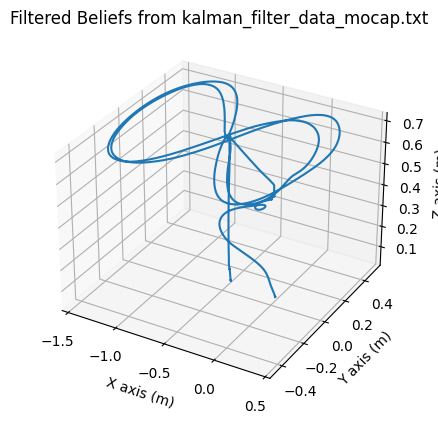

In [6]:
kalmanMocap.plot_state_3D()

## Low Noise
We will follow similar steps for the low noise data, now increasing the measurement noise covariance matrix `Qlow` to 10cm * eye(3).

In [7]:
lowNoiseData = Data('data/kalman_filter_data_low_noise.txt')
Qlow =  0.1 * np.eye(3) # k x k, 3x3
kalmanLow = Kalman(lowNoiseData, R, Qlow, C1)
kalmanLow.execute();

Plotting the low noise filtered results in 3D:

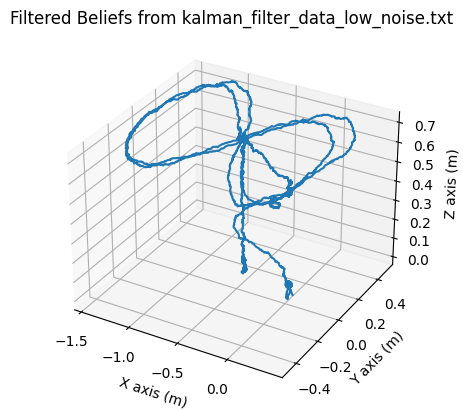

In [8]:
kalmanLow.plot_state_3D()

## High Noise
Repeating the process again for the high noise but with a measaurement nosie covariance matrix `Qhigh` of 50cm * eye(3).

In [9]:
highNoiseData = Data('data/kalman_filter_data_high_noise.txt')
Qhigh =  0.5 * np.eye(3) # k x k, 3x3
kalmanHigh = Kalman(highNoiseData, R, Qhigh, C1)
kalmanHigh.execute();

Plotting the high noise filtered states in 3D:

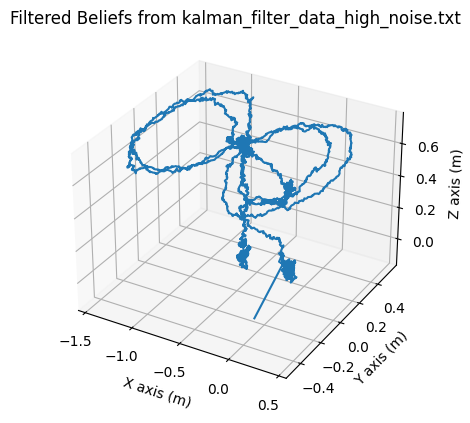

In [10]:
kalmanHigh.plot_state_3D()

## Velocity Measurements
For the velocity measurement data, we will repeat a similar process as above. However, we will use the `C2` matrix defined above. Also, we will use a measurement noise covariance matrix `Qvel` of 1cm/s * eye(3)

In [11]:
velData = Data('data/kalman_filter_data_velocity.txt')
Q = 0.05 * np.eye(3) # k x k, 3x3
kalmanVel = Kalman(velData, R, Q, C2, measType='vel')
kalmanVel.execute();

And plotting the states in 3D:

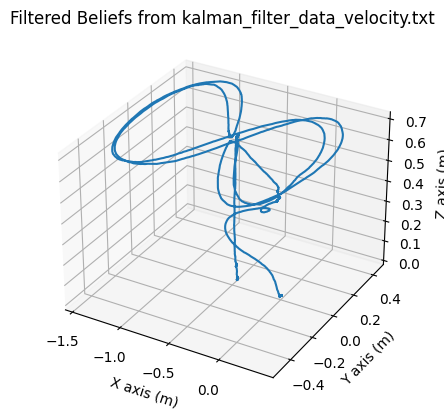

In [12]:
kalmanVel.plot_state_3D()

## Comparison
Using three helper functions, we can view the measurements of all 4 filters vs time and in 3d.

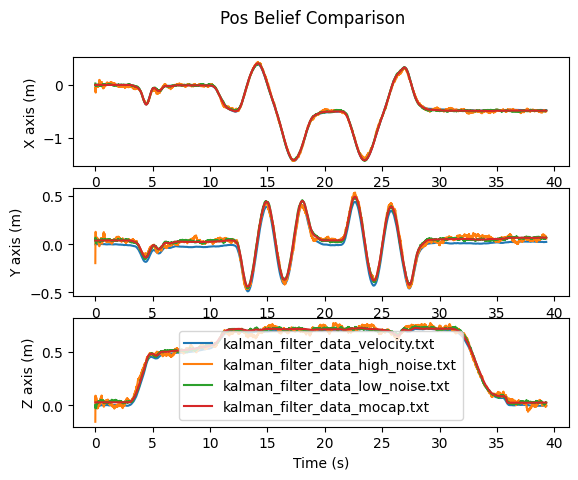

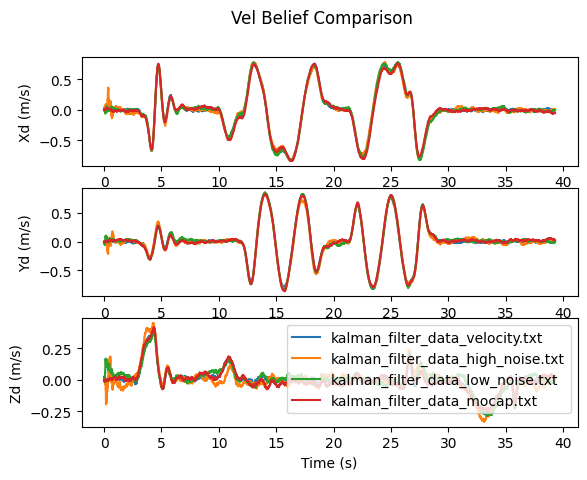

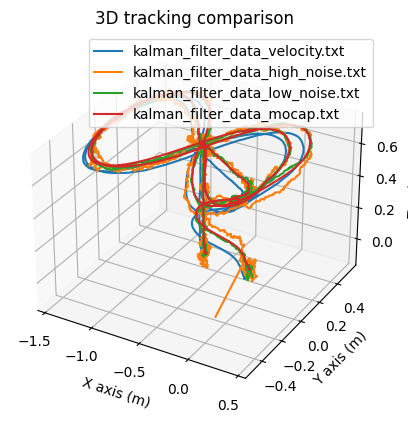

In [13]:
compare_tracks([kalmanMocap, kalmanLow, kalmanHigh, kalmanVel])
compare_vel([kalmanMocap, kalmanLow, kalmanHigh, kalmanVel])
compare_tracks_3D([kalmanMocap, kalmanLow, kalmanHigh, kalmanVel])

As expected, the kalman filter worked great at recovering the drones state despite the added noise. The larger the injected noise, the more deviation we see in the drone state. Additionally, we often see a constant error in the position from the velocity measurement data. The reason for this is because our filter is essentially integrating the filtered velocity measurements to calculate a position. This type of calculation is subject to drift due to there being no way to correct for the increasing position error.

## Error Analysis
Another way to verify my Kalman filter on the noisy data is by comparing the position error between raw measurements and filtered states. The errors will be computed against the filtered motion capture data.

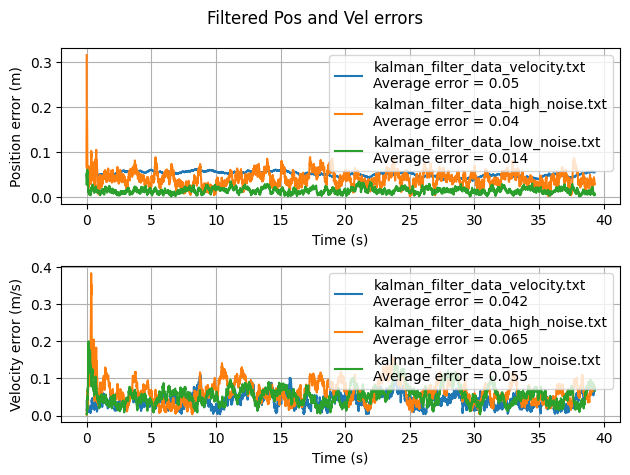

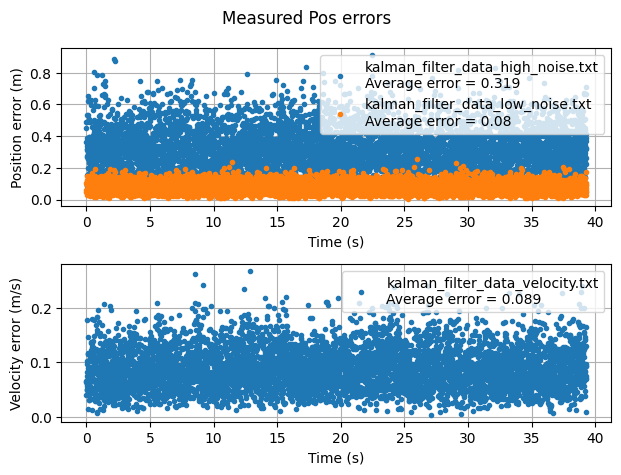

In [14]:
plot_error(kalmanMocap, [kalmanLow, kalmanHigh, kalmanVel])
plot_z_error(kalmanMocap, [kalmanLow, kalmanHigh, kalmanVel])

Clearly from these plots, the Kalman filter greatly reduced the average position error from raw measurement to filtered state. In the low noise case, this error reduced from 0.08m to 0.014m. In the high noise case, this reduced from 0.319m to 0.04m. For the velocity measssurements, the average velocity error reduced from 0.089m/s to 0.042m/s. These are massive improvements in tracking accuracy and highlight the usefullness of the Kalman filter for this use case.